# interpolate

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import numba

In [4]:
s_n = lambda x, h: np.where(np.abs(x) < 1e-5, 1.0, np.sin(np.pi * x / h) / np.tan(x / 2) / (2 * np.pi / h))

In [5]:
p = lambda v_m, x, x_m, h: (v_m[None] * s_n(x[:, None] - x_m[None], h)).sum(axis=1)

In [6]:
f = lambda x: np.exp(np.sin(x))

In [105]:
def calc_p_fine(mx):
    L = 2 * np.pi
    nx_fine = 1000
    x_fine = np.linspace(0, L, nx_fine)

    h = L / mx
    x_m = np.linspace(h, L, mx)

    v_m = f(x_m)
    return x_fine, p(v_m, x, x_m, h)

/tmp/nix-shell.bQzgzI/ipykernel_3775532/510097574.py:1: RuntimeWarning: invalid value encountered in divide
  s_n = lambda x, h: np.where(np.abs(x) < 1e-5, 1.0, np.sin(np.pi * x / h) / np.tan(x / 2) / (2 * np.pi / h))


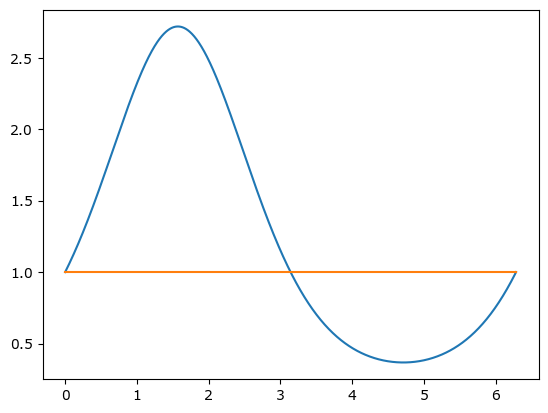

In [127]:
x, pp = calc_p_fine(2)
plt.plot(x, f(x))
plt.plot(x, pp)

/tmp/nix-shell.bQzgzI/ipykernel_3775532/510097574.py:1: RuntimeWarning: invalid value encountered in divide
  s_n = lambda x, h: np.where(np.abs(x) < 1e-5, 1.0, np.sin(np.pi * x / h) / np.tan(x / 2) / (2 * np.pi / h))


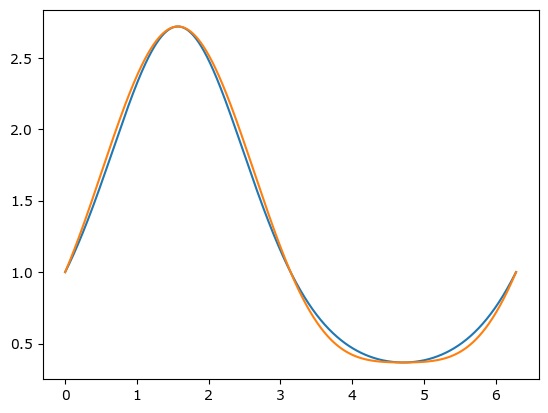

In [106]:
x, pp = calc_p_fine(4)
plt.plot(x, f(x))
plt.plot(x, pp)

/tmp/nix-shell.bQzgzI/ipykernel_3775532/510097574.py:1: RuntimeWarning: invalid value encountered in divide
  s_n = lambda x, h: np.where(np.abs(x) < 1e-5, 1.0, np.sin(np.pi * x / h) / np.tan(x / 2) / (2 * np.pi / h))


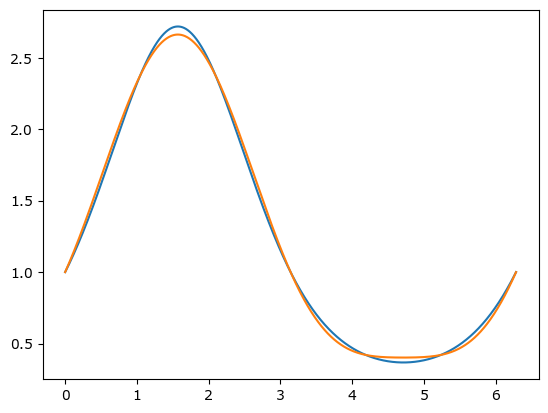

In [128]:
x, pp = calc_p_fine(6)
plt.plot(x, f(x))
plt.plot(x, pp)

/tmp/nix-shell.bQzgzI/ipykernel_3775532/510097574.py:1: RuntimeWarning: invalid value encountered in divide
  s_n = lambda x, h: np.where(np.abs(x) < 1e-5, 1.0, np.sin(np.pi * x / h) / np.tan(x / 2) / (2 * np.pi / h))


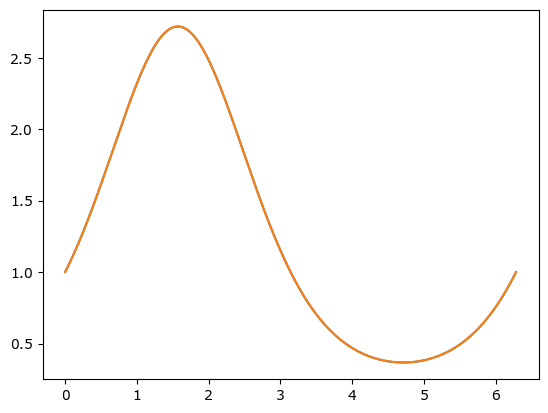

In [129]:
x, pp = calc_p_fine(8)
plt.plot(x, f(x))
plt.plot(x, pp)

In [107]:
def calc_norm(x, y, dx):
    return np.sum((x[1:] - y[1:])**2) * dx

def calc_p_norm(mx):
    x, pp = calc_p_fine(mx)
    dx = x[1] - x[0]
    return calc_norm(pp, f(x), dx) 

In [123]:
mxs = np.arange(1, 20) * 2

In [124]:
norms = [calc_p_norm(mx) for mx in mxs ]

/tmp/nix-shell.bQzgzI/ipykernel_3775532/510097574.py:1: RuntimeWarning: invalid value encountered in divide
  s_n = lambda x, h: np.where(np.abs(x) < 1e-5, 1.0, np.sin(np.pi * x / h) / np.tan(x / 2) / (2 * np.pi / h))


In [125]:
norms

[4.696389143254409,
 0.012787676241151942,
 0.006365784522306929,
 1.8648638696179644e-06,
 9.388192195983736e-07,
 6.45270786525615e-11,
 3.238859898600018e-11,
 7.672655627364316e-16,
 3.845871112324418e-16,
 3.9273425096631955e-21,
 1.967127150972127e-21,
 1.0299990328122607e-26,
 5.0684507677811395e-27,
 5.524430496426519e-29,
 1.0163617154242654e-28,
 2.677405221600441e-29,
 3.560272956904633e-29,
 5.352416897048233e-29,
 6.584095047226193e-29]

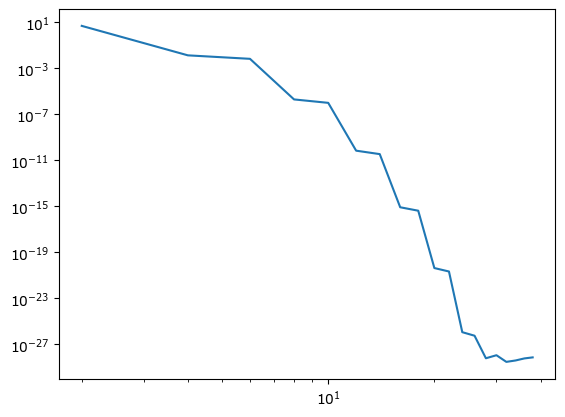

In [126]:
plt.loglog(mxs, norms)

# 2D

In [6]:
def f_peri(coords):
    xx, yy = coords * 200.0 / 2 / np.pi
    pil = np.pi / 200.0
    return 0.5 + 0.01 * (
        np.cos(6 * pil * xx) * np.cos(8 * pil * yy) + (
            np.cos(8 * pil * xx) * np.cos(6 * pil * yy)
        )**2 + np.cos(2 * pil * xx - 10 * pil * yy) * np.cos(4 * pil * xx - 2 * pil * yy)
    )


def f_initial(coords):
    xx, yy = coords * 200.0 / 2 / np.pi
    return 0.5 + 0.01 * (
        np.cos(0.105 * xx) * np.cos(0.11 * yy) + (
            np.cos(0.13 * xx) * np.cos(0.087 * yy)
        )**2 + np.cos(0.025 * xx - 0.15 * yy) * np.cos(0.07 * xx - 0.02 * yy)
    )

f2 = lambda x: np.exp(np.sin(x[0]) + np.cos(x[1])**2)

s_n = lambda x, h: np.where(np.abs(x) < 1e-5, 1.0, np.sin(np.pi * x / h) / np.tan(x / 2) / (2 * np.pi / h))

p2 = lambda v_m, x, x_m, h: (
    v_m[:, :, None, None] * s_n(x[0, None, None] - x_m[0, :, :, None, None], h) * \
    s_n(x[1, None, None] - x_m[1, :, :, None, None], h)
).sum(axis=(0, 1))

In [7]:
def calc_p_fine(mx, func):
    L = 2 * np.pi
    nx_fine = 1000
    x_fine = np.linspace(0, L, nx_fine)
    x = np.array(np.meshgrid(x_fine, x_fine))

    h = L / mx
    tmp = np.linspace(h, L, mx)
    x_m = np.array(np.meshgrid(tmp, tmp))

    v_m = func(x_m)
    
    return x, p2(v_m, x, x_m, h)

/tmp/nix-shell.s9LRqP/ipykernel_132157/126082032.py:21: RuntimeWarning: invalid value encountered in divide
  s_n = lambda x, h: np.where(np.abs(x) < 1e-5, 1.0, np.sin(np.pi * x / h) / np.tan(x / 2) / (2 * np.pi / h))


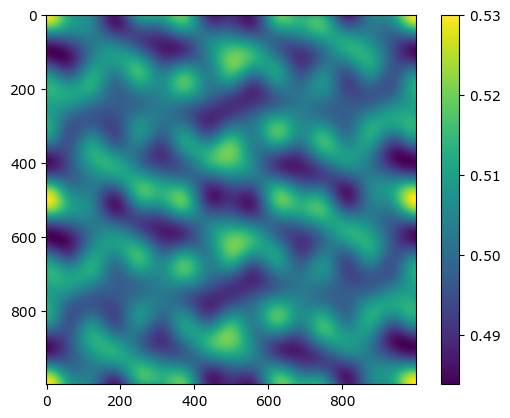

In [8]:
x, p2_x = calc_p_fine(10, f2)


plt.imshow(f_peri(x))
plt.colorbar()

In [29]:
def calc_norm(x1, x2, dx):
    return np.sum((x1[1:, 1:] - x2[1:, 1:])**2) * dx**2

def calc_p_norm(mx, func):
    x, pp = calc_p_fine(mx, func)
    dx = x[0, 0, 1] - x[0, 0, 0]
    return calc_norm(pp, func(x), dx) 

In [ ]:
mxs = np.arange(1, 15) * 4

mse = [calc_p_norm(mx, f_initial) for mx in mxs]

/tmp/nix-shell.mRxAVW/ipykernel_3330029/510097574.py:1: RuntimeWarning: invalid value encountered in divide
  s_n = lambda x, h: np.where(np.abs(x) < 1e-5, 1.0, np.sin(np.pi * x / h) / np.tan(x / 2) / (2 * np.pi / h))


In [37]:
print(mse)

[0.012398690528868632, 0.007710628438351129, 0.004996487228051346, 0.002282346017751935, 0.0016038107151770148, 0.000616850275068058, 0.0003701101650408507, 7.008681041502584e-29, 1.1560271253937092e-28, 3.060794375452979e-28, 2.5854295741478047e-28, 7.800955435672364e-28, 1.1503029775394805e-28, 1.8597669990738768e-28]


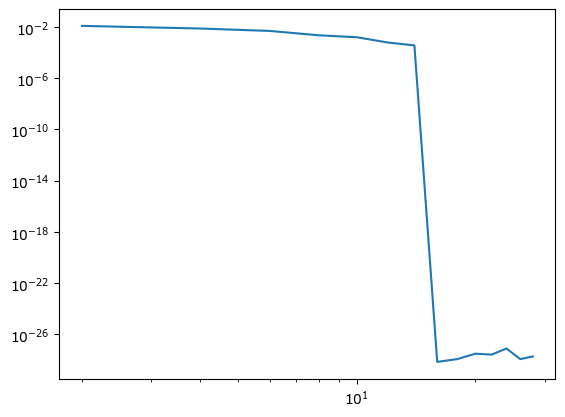

In [38]:
plt.loglog(mxs, mse)

## Speed things up, use less memory

In [7]:
def f_peri(coords):
    xx, yy = coords * 200.0 / 2 / np.pi
    pil = np.pi / 200.0
    return 0.5 + 0.01 * (
        np.cos(6 * pil * xx) * np.cos(8 * pil * yy) + (
            np.cos(8 * pil * xx) * np.cos(6 * pil * yy)
        )**2 + np.cos(2 * pil * xx - 10 * pil * yy) * np.cos(4 * pil * xx - 2 * pil * yy)
    )


def f_initial(coords):
    xx, yy = coords * 200.0 / 2 / np.pi
    return 0.5 + 0.01 * (
        np.cos(0.105 * xx) * np.cos(0.11 * yy) + (
            np.cos(0.13 * xx) * np.cos(0.087 * yy)
        )**2 + np.cos(0.025 * xx - 0.15 * yy) * np.cos(0.07 * xx - 0.02 * yy)
    )

f2 = lambda x: np.exp(np.sin(x[0]) + np.cos(x[1])**2)

@numba.jit(nopython=True)
def s_n_(x, h):
    value = np.zeros_like(x)
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            if abs(x[i, j]) < 1e-5:
                value[i, j] = 1.0
            else:
                value[i, j] = np.sin(np.pi * x[i, j] / h) / np.tan(x[i, j] / 2) / (2 * np.pi / h)
    return value

def p2(v_m, x, x_m, h):
    return (
        v_m[:, :, None, None] * s_n(x[0, None, None] - x_m[0, :, :, None, None], h) * \
        s_n(x[1, None, None] - x_m[1, :, :, None, None], h)
    ).sum(axis=(0, 1))

@numba.jit(nopython=False)
def p2_slow(v_m, x, x_m, h):
    
    sum_ = 0.0
    for i in range(x_m[0].shape[0]):
        for j in range(x_m[0].shape[1]):
            blah = v_m[i, j, None, None] * s_n_(x[0] - x_m[0, i, j, None, None], h) * s_n_(x[1] - x_m[1, i, j, None, None], h)
            sum_ += blah
    
    return sum_

In [8]:
func = f_peri
mx = 10
L = 2 * np.pi
nx_fine = 1000
x_fine = np.linspace(0, L, nx_fine)
x = np.array(np.meshgrid(x_fine, x_fine))

h = L / mx
tmp = np.linspace(h, L, mx)
x_m = np.array(np.meshgrid(tmp, tmp))

v_m = func(x_m)

In [13]:
x_m.shape

(2, 10, 10)

In [17]:
2 * np.pi / 999

0.006289474781961547

In [15]:
x[0, 0, 0] - x[0, 0, 1]

-0.006289474781961547

In [11]:
x.shape

(2, 1000, 1000)

In [33]:
pp_slow = p2_slow(v_m, x, x_m, h)

/tmp/nix-shell.SLpjxd/ipykernel_167538/1533408400.py:38: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "p2_slow" failed type inference due to: No implementation of function Function(<built-in function getitem>) found for signature:
 
 >>> getitem(array(float64, 2d, C), Tuple(int64, int64, none, none))
 
There are 22 candidate implementations:
      - Of which 20 did not match due to:
      Overload of function 'getitem': File: <numerous>: Line N/A.
        With argument(s): '(array(float64, 2d, C), Tuple(int64, int64, none, none))':
       No match.
      - Of which 2 did not match due to:
      Overload in function 'GetItemBuffer.generic': File: numba/core/typing/arraydecl.py: Line 166.
        With argument(s): '(array(float64, 2d, C), Tuple(int64, int64, none, none))':
       Rejected as the implementation raised a specific error:
         NumbaTypeError: unsupported array index type none in Tuple(int64, int64, none, none)
  rais

In [36]:
%%timeit

pp = p2(v_m, x, x_m, h)

/tmp/nix-shell.s9LRqP/ipykernel_132157/4174736662.py:21: RuntimeWarning: invalid value encountered in divide
  s_n = lambda x, h: np.where(np.abs(x) < 1e-5, 1.0, np.sin(np.pi * x / h) / np.tan(x / 2) / (2 * np.pi / h))


5.54 s ± 12.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [34]:
%%timeit

pp_slow = p2_slow(v_m, x, x_m, h)

4.67 s ± 7.74 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


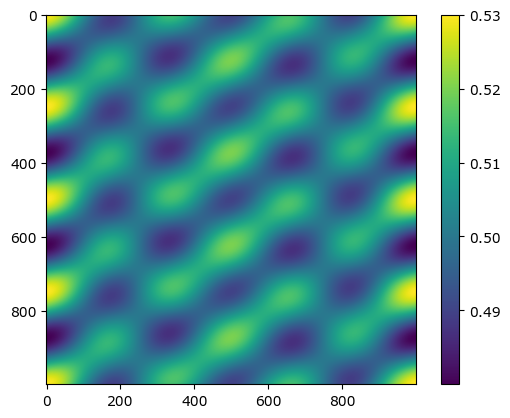

In [11]:
plt.imshow(pp)
plt.colorbar()

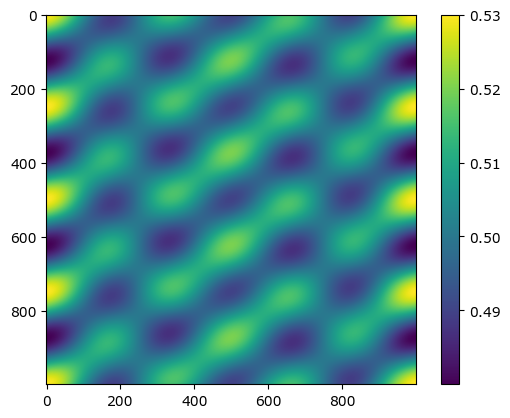

In [40]:
plt.imshow(pp_slow)
plt.colorbar()

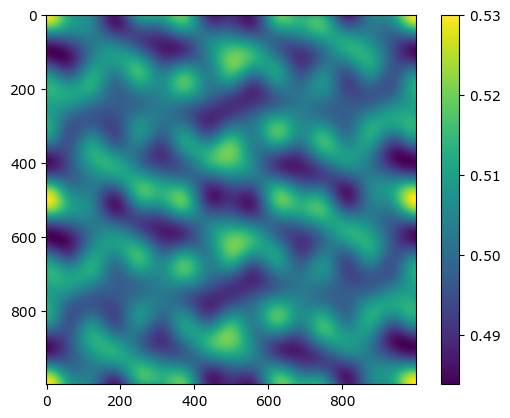

In [12]:
plt.imshow(f_peri(x))
plt.colorbar()